In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

## 0. Selecting attributes

As I am aware of the course of dymensionality I will try to hand pick a couple tens of attributes to base my model on.

As a starter I will pick them by gut:
- **LotArea**: area of the lot
- **Neighborhood**: Ames city neighborhood
- ~~**BldgType**: type of dwelling (1/2 families, ...)  [Heavily skewed, 1200 1fam]~~
- **HouseStyle**: Style of dwelling (stories)
- **OverallQual**: rate of materials and finish
- **OverallCond**: rate of overall condition
- **YearBuilt**: construction date
- **YearRemodAdd**: remodel date
- **ExterQual**: quality of the exterior
- ~~**ExterCond**: condition of the material on the exterior [Heavily skewed, 1200 TA]~~
- **BsmtQual**: Height of the basement
- ~~**BsmtCond**: Conditions of the basement [Heavily skewed, 1200 TA]~~
- **TotalBsmtSF**: basement area
- **HeatingQC**: heating quality and condition
- **CentralAir**: central air conditoning  [Heavily skewed, 1200 Yes]
- **1stFlrSF**: first floor square feet
- **2ndFlrSF**: second floor square feet
- **GrLivArea**: above grade living area
- **FullBath**: full bathrooms above grade
- **HalfBath**: half bathrooms above grade
- **BedroomAbvGr**: bedrooms above grade
- **KitchenQual**: kitchen quality
- **TotRmsAbvGrd**: total rooms above grade (wo bathrooms)
- **Fireplaces**: number of fireplaces
- **GarageArea**: size of garage in square feet
- ~~**GarageQual**: garage quality [Heavily skewed, 1300 TA]~~
- ~~**MiscValue**: value in dollars of miscellaneous feature [Heavily skewed, 1400 0]~~
- ~~**SaleType**: Type of sale [Heavily skewed, 1300 normal WD]~~
- ~~**SaleCondition**: Condition of sale [Heavily skewed, 1300 normal]~~


In [461]:
chosenAttributes = [
    'LotArea', 
    'Neighborhood', 
    'HouseStyle', 
    'OverallQual', 
    'OverallCond', 
    'YearBuilt', 
    'YearRemodAdd', 
    'ExterQual', 
    'BsmtQual', 
    'TotalBsmtSF', 
    'HeatingQC', 
    'CentralAir', 
    '1stFlrSF', 
    '2ndFlrSF', 
    'GrLivArea', 
    'FullBath', 
    'HalfBath', 
    'BedroomAbvGr', 
    'KitchenQual', 
    'TotRmsAbvGrd', 
    'Fireplaces', 
    'GarageArea',
    'SalePrice'
]

dfs = df[chosenAttributes]

## 1. Dataset overview

In [463]:
dfs.head()

,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,...,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
0,8450,CollgCr,2Story,7,5,2003,2003,Gd,Gd,856,...,854,1710,2,1,3,Gd,8,0,548,208500
1,9600,Veenker,1Story,6,8,1976,1976,TA,Gd,1262,...,0,1262,2,0,3,TA,6,1,460,181500
2,11250,CollgCr,2Story,7,5,2001,2002,Gd,Gd,920,...,866,1786,2,1,3,Gd,6,1,608,223500
3,9550,Crawfor,2Story,7,5,1915,1970,TA,TA,756,...,756,1717,1,0,3,Gd,7,1,642,140000
4,14260,NoRidge,2Story,8,5,2000,2000,Gd,Gd,1145,...,1053,2198,2,1,4,Gd,9,1,836,250000


In [464]:
dfs.describe().round(2)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,10516.83,6.10,5.58,1971.27,1984.87,1057.43,1162.63,346.99,1515.46,1.57,0.38,2.87,6.52,0.61,472.98,180921.2
std,9981.26,1.38,1.11,30.20,20.65,438.71,386.59,436.53,525.48,0.55,0.50,0.82,1.63,0.64,213.80,79442.5
min,1300.00,1.00,1.00,1872.00,1950.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,2.00,0.00,0.00,34900.0
25%,7553.50,5.00,5.00,1954.00,1967.00,795.75,882.00,0.00,1129.50,1.00,0.00,2.00,5.00,0.00,334.50,129975.0
50%,9478.50,6.00,5.00,1973.00,1994.00,991.50,1087.00,0.00,1464.00,2.00,0.00,3.00,6.00,1.00,480.00,163000.0
75%,11601.50,7.00,6.00,2000.00,2004.00,1298.25,1391.25,728.00,1776.75,2.00,1.00,3.00,7.00,1.00,576.00,214000.0
max,215245.00,10.00,9.00,2010.00,2010.00,6110.00,4692.00,2065.00,5642.00,3.00,2.00,8.00,14.00,3.00,1418.00,755000.0


In [465]:
dfs.describe(include='object')

,Neighborhood,HouseStyle,ExterQual,BsmtQual,HeatingQC,CentralAir,KitchenQual
count,1460,1460,1460,1423,1460,1460,1460
unique,25,8,4,4,5,2,4
top,NAmes,1Story,TA,TA,Ex,Y,TA
freq,225,726,906,649,741,1365,735


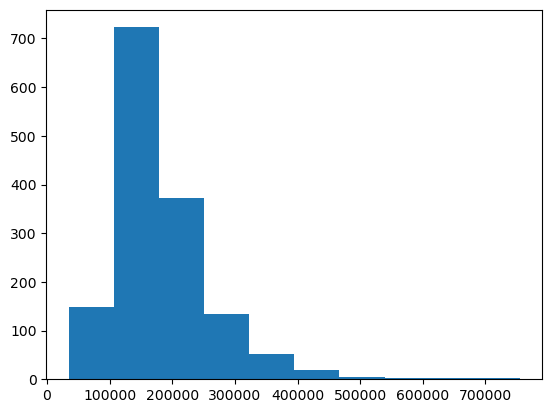

In [492]:
plt.figure()
plt.hist(dfs['SalePrice'])
plt.show()

## 1. Missing values

In [399]:
null_col = dfs.isnull().sum()
null_col[null_col > 0].sort_values(ascending=False)

BsmtQual    37
dtype: int64

## 2. Outliers

In [400]:
from scipy import stats

def plot_outliers(norm, outl, attribute):
    max_nor = norm.max(); max_out = outl.max()
    max_val = max(max_nor, max_out)
    min_nor = norm.min(); min_out = outl.min()
    min_val = min(min_nor, min_out)

    bins_norm = max(round((max_nor - min_nor) / (max_val - min_val) * 100), 1)

    if not outl.empty:
        bins_outl = max(round((max_out - min_out) / (max_val - min_val) * 100), 1)

    plt.figure(figsize=(8,5))
    plt.title('Outliers - ' + attribute)
    plt.hist(norm, bins=bins_norm)
    if not outl.empty:
        plt.hist(outl, bins=bins_outl)
    plt.show()

def find_and_plot_outliers (attribute, z_thresh=3, dataframe=dfs):
    z_score = np.abs(stats.zscore(dataframe[attribute]))
    outliers = np.where(z_score > z_thresh)[0]

    norm_values = dataframe.drop(outliers)
    outl_values = dataframe.take(outliers)

    plot_outliers(norm_values[attribute], outl_values[attribute], attribute)

    return outliers


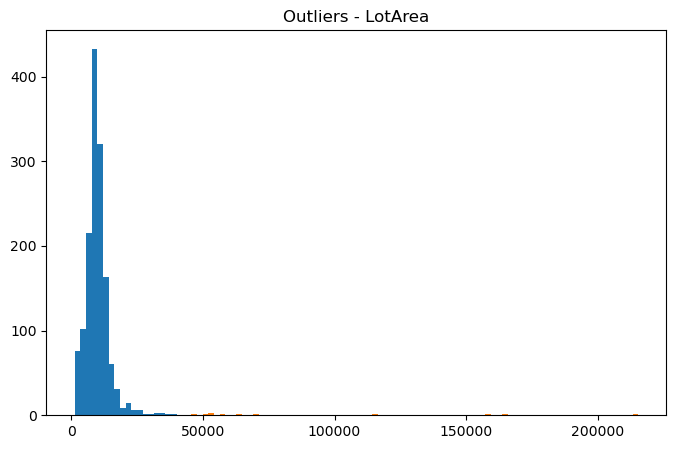

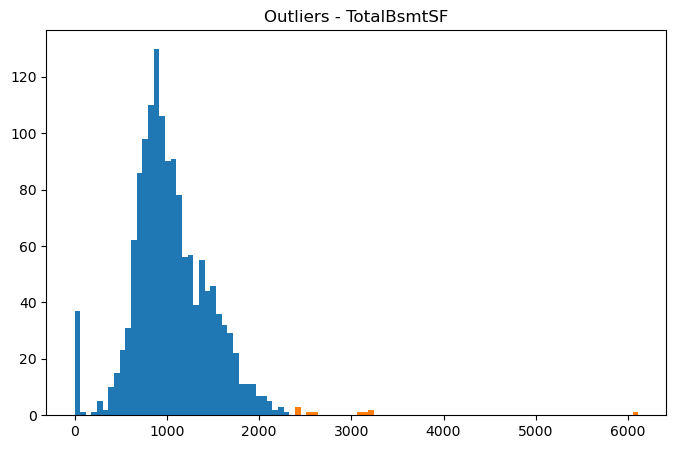

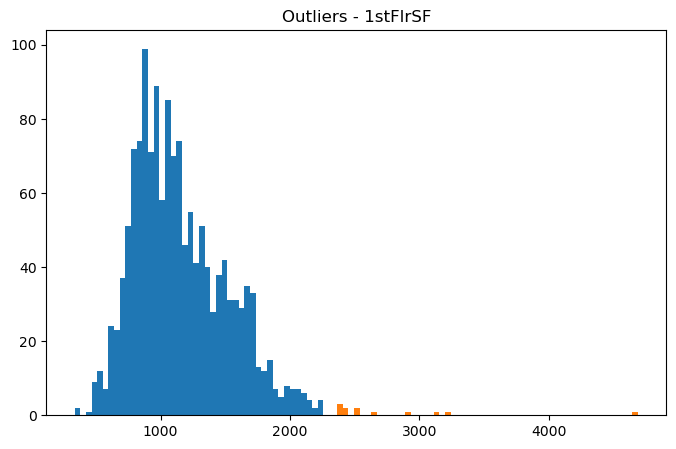

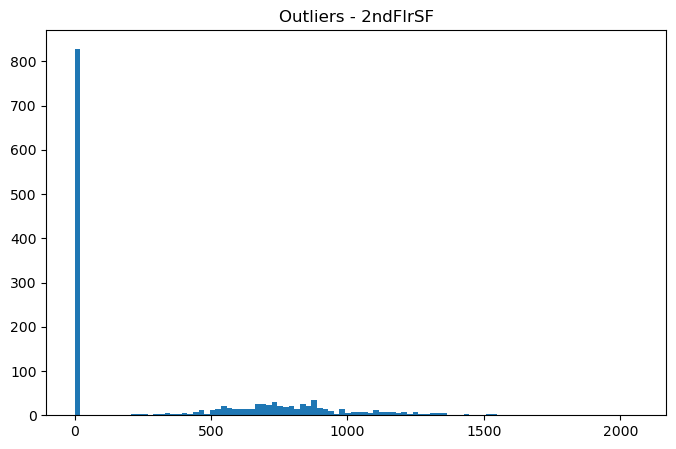

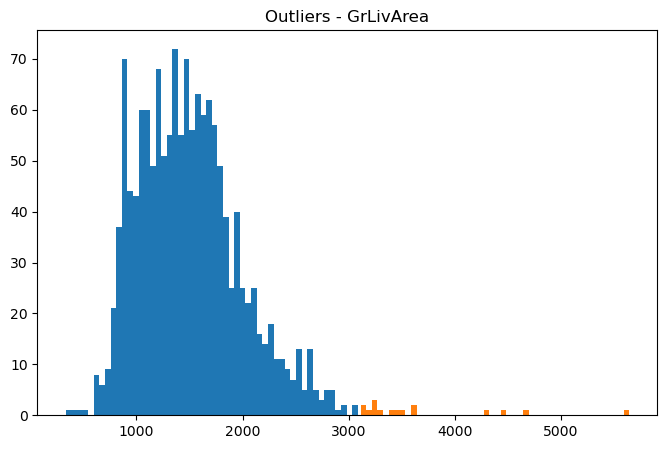

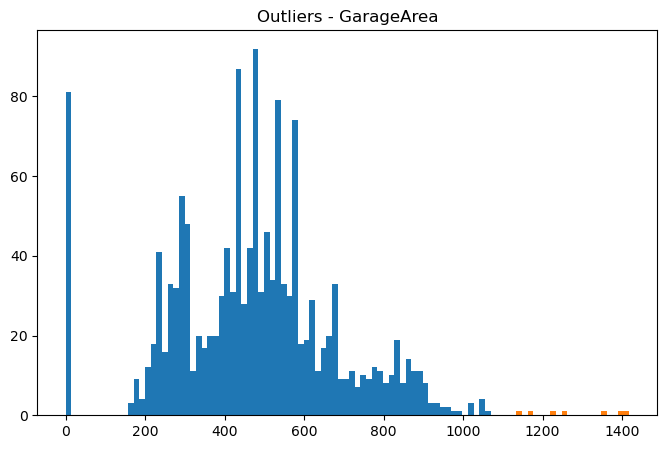

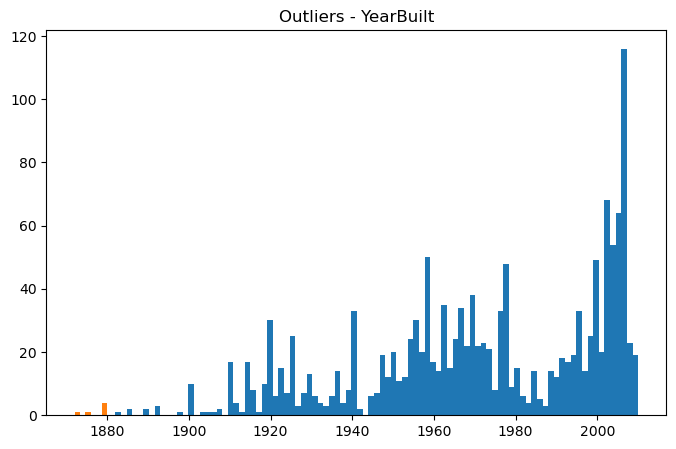

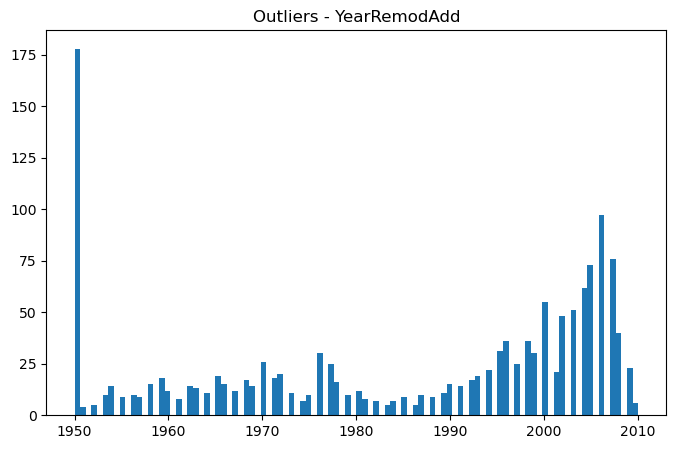

In [401]:
outliers = {}
numerical = ['LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearRemodAdd']

for attribute in numerical:
    outliers[attribute] = find_and_plot_outliers(attribute, z_thresh=3)

In [402]:
found_outliers = set()

for attribute in numerical:
    for value in outliers[attribute]:
        found_outliers.add(int(value))

print('number of outliers: ' + str(len(found_outliers)))
print(found_outliers)

number of outliers: 46
{384, 769, 898, 1024, 523, 529, 1298, 1169, 1044, 661, 664, 1182, 798, 1061, 1190, 304, 178, 691, 53, 440, 313, 185, 825, 706, 451, 197, 581, 1349, 457, 1353, 332, 335, 848, 1373, 224, 608, 747, 1132, 496, 1137, 1396, 1268, 118, 630, 249, 635}


In [403]:
dfo = dfs.drop(found_outliers)
print(dfo.shape)

(1414, 23)


## 3. Data Transformation

In [404]:
import math

def plot_hist_matrix(attributes, num_cols=3, df=dfo):
    num_attributes = len(attributes)
    num_rows = math.ceil(num_attributes/num_cols)

    plt.figure(figsize=(5*num_cols, 4*num_rows))
    for index, attribute in enumerate(attributes):
        plt.subplot(num_rows, num_cols, index+1)
        plt.title(attribute)
        plt.hist(df[attribute], bins=30)
    plt.show()


In [413]:
categorial = list(dfo.columns.values)
categorial.remove('SalePrice')

for attr in numerical:
    categorial.remove(attr)

print(categorial)

['Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces']


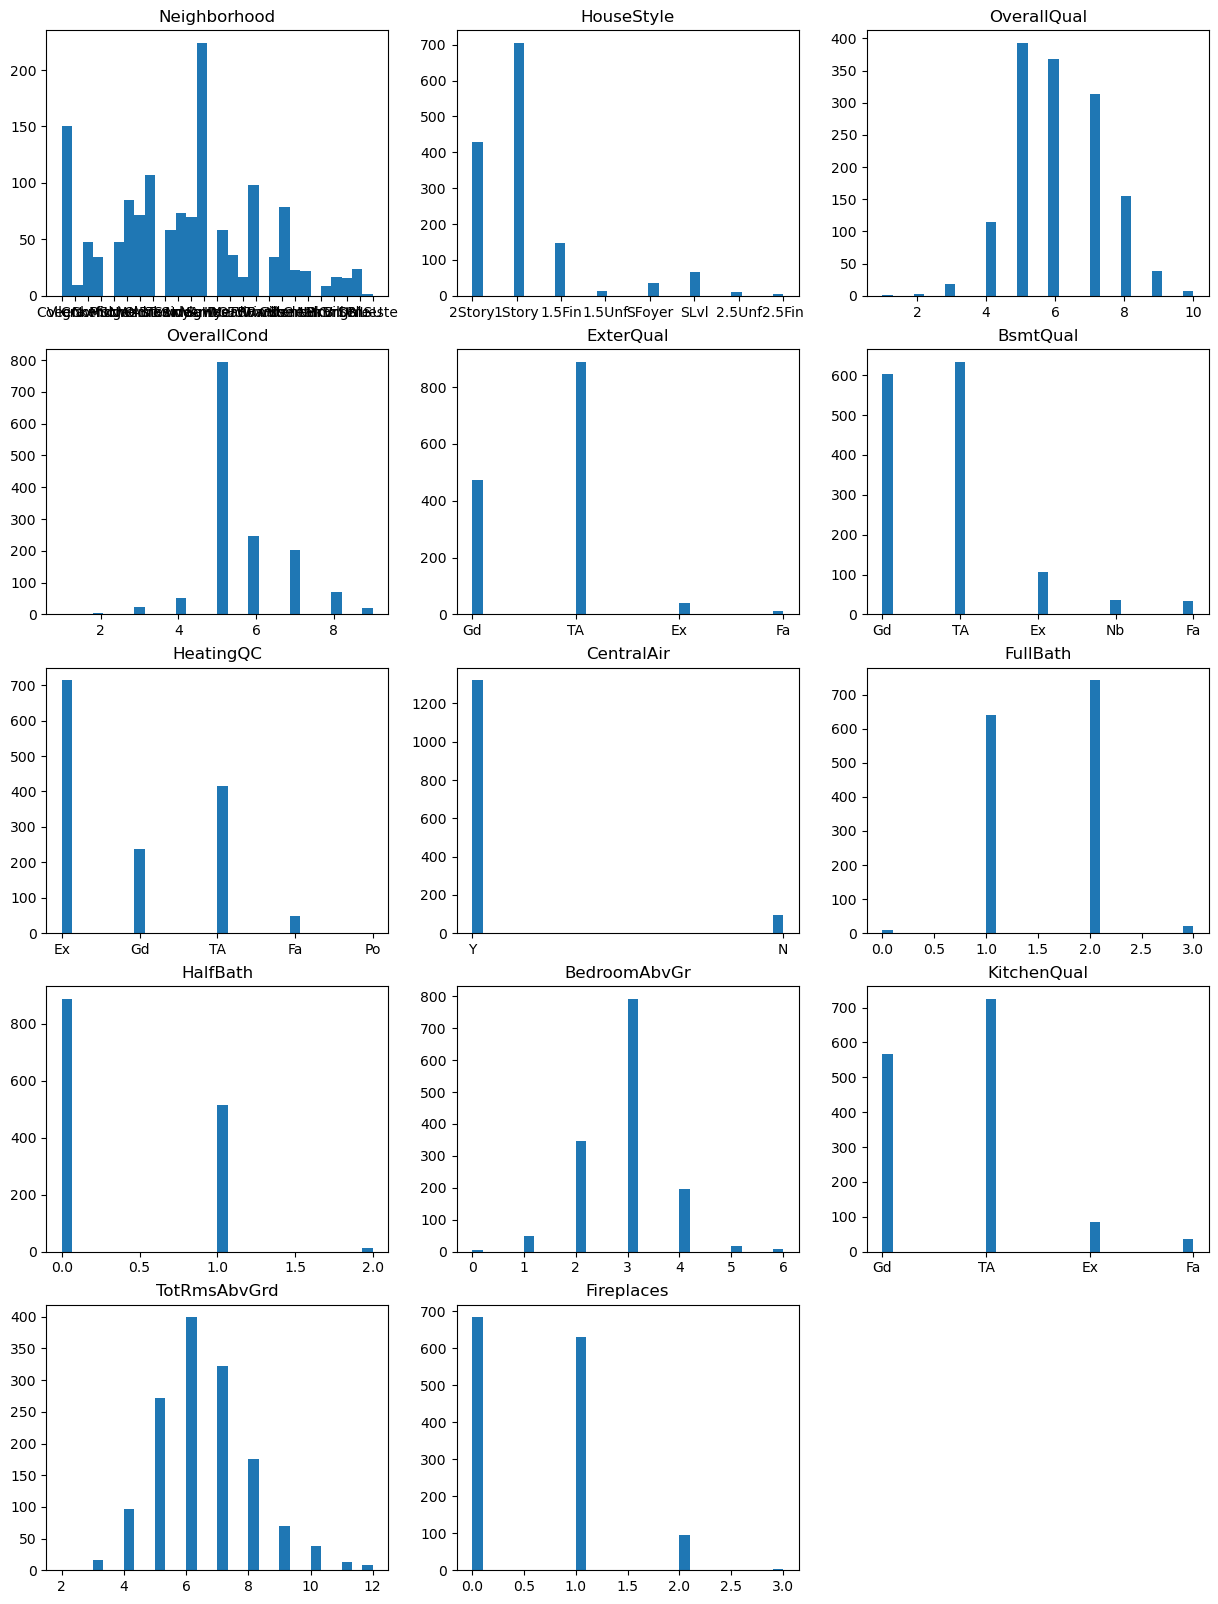

In [414]:
dfo1 = dfo.copy()
dfo1['BsmtQual'] = dfo1['BsmtQual'].replace(np.nan, 'Nb')
plot_hist_matrix(categorial, df=dfo1)

In [450]:
dft = dfo.copy()

### 3.1 Quality attributes

In [451]:
def transform_quality_attributes(df=dft):
    for attr in categorial:
        if 'Qual' in attr or 'QC' in attr:
            df[attr] = df[attr].replace(np.nan, 0)
            df[attr] = df[attr].replace('Po', 1)
            df[attr] = df[attr].replace('Fa', 2)
            df[attr] = df[attr].replace('TA', 3)
            df[attr] = df[attr].replace('Gd', 4)
            df[attr] = df[attr].replace('Ex', 5)
        
transform_quality_attributes()

/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_1337/728277296.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attr] = df[attr].replace('Ex', 5)


### 3.2 CentralAir

In [452]:
def transform_central_air(df=dft):
    df['CentralAir'] = df['CentralAir'].replace('N', 0)
    df['CentralAir'] = df['CentralAir'].replace('Y', 1)

transform_central_air()

/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_1337/977536736.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CentralAir'] = df['CentralAir'].replace('Y', 1)


### 3.3 HouseStyle

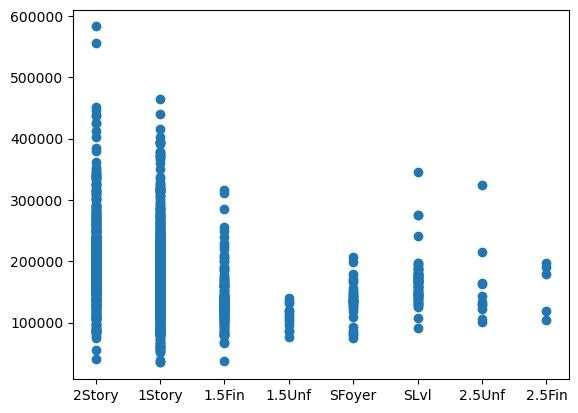

In [453]:
plt.scatter(dft['HouseStyle'], dft['SalePrice'])

In [454]:
house_style_avg_sale_price = {}

house_style_labels = df['HouseStyle'].unique()

for label in house_style_labels:
    house_style_avg_sale_price[label] = df['SalePrice'][df['HouseStyle'] == label].mean()

In [455]:
def transform_house_style(df=dft):
    house_style_labels = df['HouseStyle'].unique()

    for label in house_style_labels:
        df['HouseStyle'] = df['HouseStyle'].replace(label, house_style_avg_sale_price[label])

transform_house_style()

/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_1337/2788338798.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HouseStyle'] = df['HouseStyle'].replace(label, house_style_avg_sale_price[label])


### 3.4 Neighborhood

In [456]:
neighborhood_avg_sale_price = {}

neighborhood_labels = df['Neighborhood'].unique()

for label in neighborhood_labels:
    neighborhood_avg_sale_price[label] = df['SalePrice'][df['Neighborhood'] == label].mean()

In [457]:
def transform_neightborhood(df=dft):
    neighborhood_labels = df['Neighborhood'].unique()

    for label in neighborhood_labels:
        df['Neighborhood'] = df['Neighborhood'].replace(label, neighborhood_avg_sale_price[label])

transform_neightborhood()

/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_1337/669869548.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Neighborhood'] = df['Neighborhood'].replace(label, neighborhood_avg_sale_price[label])


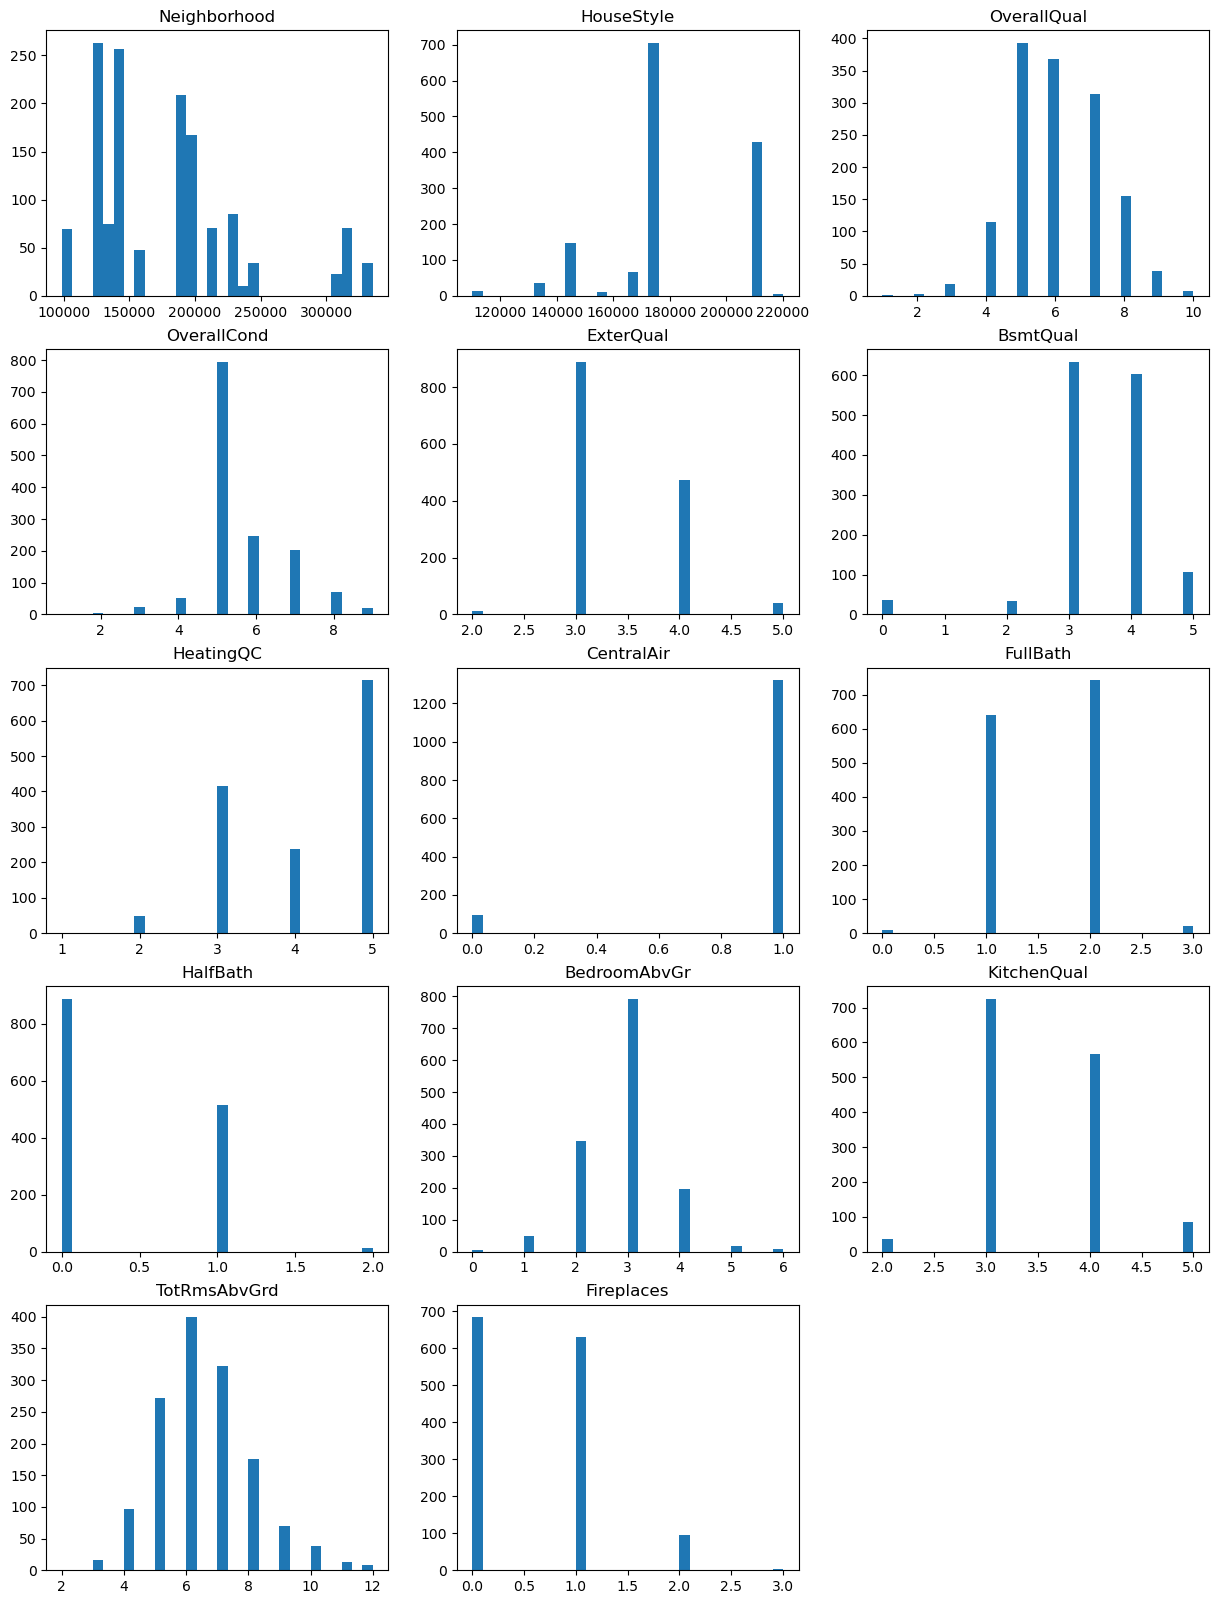

In [458]:
plot_hist_matrix(categorial, df=dft)

## 3. Data correlation

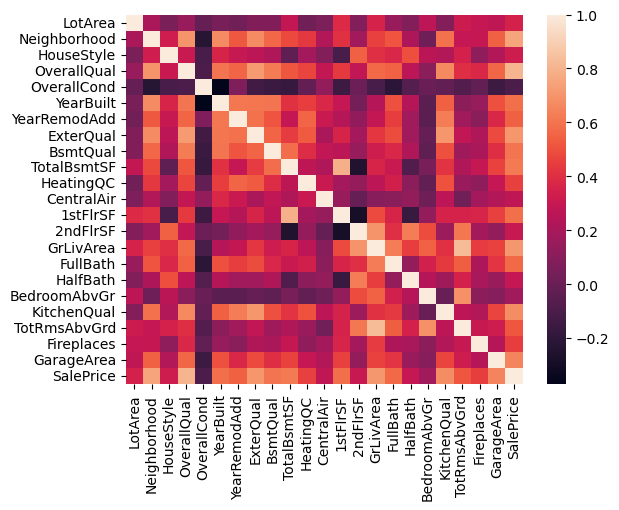

In [434]:
self_corr_matrix = dft.corr()

plt.figure()
sns.heatmap(self_corr_matrix)
plt.show()

## 5. Normalization

In [476]:
norm_values = { 'mean' : {}, 'std' : {}}

dff = dft.copy()

def compute_means_and_stds(df):
    for col in df.columns:
        norm_values['mean'][col] = df[col].mean()
        norm_values['std'][col] = df[col].std()

compute_means_and_stds(dff)
print(norm_values)

{'mean': {'LotArea': np.float64(9657.714285714286), 'Neighborhood': np.float64(179306.61581556973), 'HouseStyle': np.float64(180742.37786176262), 'OverallQual': np.float64(6.050919377652051), 'OverallCond': np.float64(5.575671852899576), 'YearBuilt': np.float64(1971.5205091937764), 'YearRemodAdd': np.float64(1984.6209335219237), 'ExterQual': np.float64(3.381895332390382), 'BsmtQual': np.float64(3.473833097595474), 'TotalBsmtSF': np.float64(1032.015558698727), 'HeatingQC': np.float64(4.141442715700141), 'CentralAir': np.float64(0.9349363507779349), '1stFlrSF': np.float64(1137.9257425742574), '2ndFlrSF': np.float64(336.65205091937764), 'GrLivArea': np.float64(1479.4214992927864), 'FullBath': np.float64(1.5495049504950495), 'HalfBath': np.float64(0.3811881188118812), 'BedroomAbvGr': np.float64(2.8543140028288545), 'KitchenQual': np.float64(3.494342291371994), 'TotRmsAbvGrd': np.float64(6.444837340876945), 'Fireplaces': np.float64(0.5898161244695899), 'GarageArea': np.float64(464.964639321

In [477]:
def normalize(df=dff):
    for col in df.columns:
        df[col] = (df[col] - norm_values['mean'][col]) / norm_values['std'][col]

normalize()
dff.head()

,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,...,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,SalePrice
0,-0.293556,0.326031,1.257615,0.709788,-0.520956,1.064108,0.886470,1.110470,0.602811,-0.454846,...,1.228392,0.498230,0.838325,1.230177,0.183982,0.778939,0.998567,-0.938500,0.408255,0.465870
1,-0.014028,1.039049,-0.204110,-0.038081,2.193902,0.151421,-0.415810,-0.686103,0.602811,0.594308,...,-0.799347,-0.469801,0.838325,-0.757789,0.183982,-0.761508,-0.285629,0.652674,-0.024409,0.079407
2,0.387033,0.326031,1.257615,0.709788,-0.520956,0.996502,0.838237,1.110470,0.602811,-0.289462,...,1.256885,0.662450,0.838325,1.230177,0.183982,0.778939,-0.285629,0.652674,0.703253,0.680571
3,-0.026182,0.547220,1.257615,0.709788,-0.520956,-1.910575,-0.705205,-0.686103,-0.542854,-0.713259,...,0.995701,0.513356,-1.022573,-0.757789,0.183982,0.778939,0.356469,0.652674,0.870419,-0.514600
4,1.118667,2.725586,1.257615,1.457658,-0.520956,0.962698,0.741772,1.110470,0.602811,0.291966,...,1.700898,1.552693,0.838325,1.230177,1.446847,0.778939,1.640666,0.652674,1.824247,1.059877


## 6. Prepare test data

In [489]:
test_df_raw = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

test_attributes = chosenAttributes.copy()
test_attributes.remove('SalePrice')
test_df = test_df_raw[test_attributes]

transform_central_air(test_df)
transform_house_style(test_df)
transform_neightborhood(test_df)
transform_quality_attributes(test_df)

test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].replace(np.nan, 0)
test_df['GarageArea'] = test_df['GarageArea'].replace(np.nan, 0)

normalize(test_df)

test_df.head()

/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_1337/977536736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CentralAir'] = df['CentralAir'].replace('N', 0)
/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_1337/977536736.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CentralAir'] = df['CentralAir'].replace('Y', 1)
/var/folders/ld/5wx42w6n7d7dkx06gzxhh1qr0000gn/T/ipykernel_1337/977536736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea
0,0.477454,-0.584637,-0.204110,-0.785950,0.383997,-0.355627,-1.139299,-0.686103,-0.542854,-0.387659,-1.189235,0.263709,-0.700529,-0.799347,-1.260648,-1.022573,-0.757789,-1.078883,-0.761508,-0.927728,-0.938500,1.303083
1,1.120369,-0.584637,-0.204110,-0.038081,0.383997,-0.457037,-1.283996,-0.686103,-0.542854,0.767445,-1.189235,0.263709,0.553282,-0.799347,-0.325028,-1.022573,1.230177,0.183982,0.778939,-0.285629,-0.938500,-0.752072
2,1.014148,0.236722,1.257615,-0.785950,-0.520956,0.861289,0.645307,-0.686103,0.602811,-0.268789,-0.147365,0.263709,-0.607869,0.865109,0.323207,0.838325,1.230177,0.183982,-0.761508,-0.285629,0.652674,0.083757
3,0.077851,0.236722,1.257615,-0.038081,0.383997,0.895092,0.645307,-0.686103,-0.542854,-0.273957,0.894505,0.263709,-0.613660,0.810497,0.269187,0.838325,1.230177,0.183982,0.778939,0.356469,0.652674,0.024757
4,-1.130925,2.292320,-0.204110,1.457658,-0.520956,0.692273,0.355911,1.110470,0.602811,0.640823,0.894505,0.263709,0.411396,-0.799347,-0.430907,0.838325,-0.757789,-1.078883,0.778939,-0.927728,-0.938500,0.201756


In [490]:
null_col = test_df.isnull().sum()
null_col[null_col > 0].sort_values(ascending=False)

Series([], dtype: int64)

## 9. Output datasets

In [438]:
dff.to_csv('house-prices-advanced-regression-techniques/preprocessed.csv', index=False)

In [491]:
test_df.to_csv('house-prices-advanced-regression-techniques/preprocessed_test.csv', index=False)

import json
with open('house-prices-advanced-regression-techniques/normalization_values.json', 'w', encoding='utf-8') as f:
    json.dump(norm_values, f, ensure_ascii=False, indent=2)